In [ ]:
! pip install kaggle

In [ ]:
# configuration the path of kaggle.json file
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The Dataset is extracted')

The Dataset is extracted


In [ ]:
! pip install py7zr

In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()       # archive.extractall(path='')
archive.close

<bound method SevenZipFile.close of <py7zr.py7zr.SevenZipFile object at 0x77fef8baf6a0>>

### Importing Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['49061.png', '25561.png', '46270.png', '32363.png', '29440.png']
['5052.png', '31043.png', '42870.png', '47260.png', '1219.png']


## Labels Processing

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])

[6, 9, 9, 4, 1]


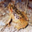

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/7796.png')    # convert a numpy array
cv2_imshow(img)  # array to image

In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


## Image Processing

In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
# convert images list and labels list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


### Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### Data Scaling

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

# tensorflow - google
# pytorch - facebook
# cntk(cognitude tool kit) - microsoft
# keras - wrapper of the libraries like tensorflow and pytorch

In [ ]:
num_of_classes = 10

# setting up the layers of nural network

model = keras.Sequential([
                            keras.layers.Flatten(input_shape = (32,32,3)),
                            keras.layers.Dense(64,activation='relu'),
                            keras.layers.Dense(num_of_classes,activation='softmax')  # binary            -   sigmoid
                                                                                     # more than 2 class -   softmax
])

In [ ]:
# compile the neural network
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1125/1125 [==============================] - 7s 5ms/step - loss: 1.9990 - accuracy: 0.2579 - val_loss: 1.8995 - val_accuracy: 0.3090
Epoch 2/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8586 - accuracy: 0.3229 - val_loss: 1.8288 - val_accuracy: 0.3358
Epoch 3/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.8315 - accuracy: 0.3359 - val_loss: 1.8153 - val_accuracy: 0.3430
Epoch 4/10
1125/1125 [==============================] - 7s 7ms/step - loss: 1.8122 - accuracy: 0.3447 - val_loss: 1.8663 - val_accuracy: 0.3137
Epoch 5/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8083 - accuracy: 0.3463 - val_loss: 1.8178 - val_accuracy: 0.3433
Epoch 6/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.7963 - accuracy: 0.3524 - val_loss: 1.8302 - val_accuracy: 0.3465
Epoch 7/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.7941 - accuracy: 0.3525 - val_loss: 1.8501 - val_accuracy:

## **Transfer Learning - ResNet50**

In [ ]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import  load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())                  # convert matrix into vector
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled,Y_train,epochs=10,validation_split=0.1)

Epoch 1/10
  11/1125 [..............................] - ETA: 10:13:38 - loss: 2.7496 - acc: 0.1364

KeyboardInterrupt: 

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='val loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['vacc_loss'],label='val accuracy')
plt.legend()
plt.show()